In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [ ]:
Data = pd.read_csv('processed_tweet_data.csv')

In [ ]:
cleanTweet = Data[['original_text','polarity']]

In [ ]:
def text_category (p):
  if p > 0:
    return 'positive'
  elif p < 0:
    return 'negative'
  else:
    return 'neutral'

In [ ]:
score = pd.Series([text_category(row_val) for row_val in cleanTweet['polarity']])

In [ ]:
cleanTweet = pd.concat([cleanTweet, score.rename("score")], axis=1)

In [ ]:
cleanTweet.head()

,original_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


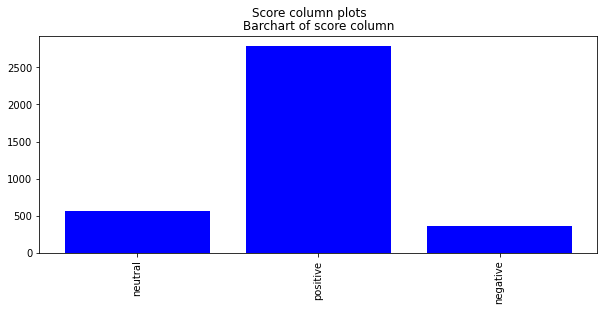

In [ ]:
# Visualize The  score  column using piechart and barchart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['neutral', 'positive', 'negative']
positive = len(cleanTweet[cleanTweet['score'] == "positive"])
negative = len(cleanTweet[cleanTweet['score'] == "negative"])
neutral = len(cleanTweet[cleanTweet['score'] == "neutral"])

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 1, figsize = (10,4))

# Create a bar plot of score column
ax.bar(x=labels, height=[negative, positive, neutral], color='blue')
ax.set_title('Barchart of score column')
ax.set_xticklabels(labels, rotation=90)

# Add a title to the Figure
fig.suptitle('Score column plots')

# Show the figure
fig.show()

In [ ]:
cleanTweet.groupby('score')['original_text'].count()

score
negative     360
neutral      201
positive    1687
Name: original_text, dtype: int64

In [ ]:
len(cleanTweet['polarity'])

3720

In [ ]:
cleanTweet = cleanTweet.drop(cleanTweet[cleanTweet.score == 'neutral'].index)

In [ ]:
cleanTweet.head()

,original_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


In [ ]:
cleanTweet[1990:2000]

,original_text,polarity,score
2191,Yet another amazingly qualified and courageous...,0.3375,positive
2192,NaN,0.3375,positive
2193,BioCubaFarma says phase 3 clinical trial resul...,0.3375,positive
2194,Africa is in the midst of a full blown third w...,0.3375,positive
2195,NaN,0.3375,positive
2196,"""In Africa, #COVID19 cases have increased by 5...",0.3375,positive
2197,NaN,0.3375,positive
2198,NaN,-0.0500,negative
2199,NaN,0.3375,positive
2200,"Dr Moeti is head of WHO in Africa, and one of ...",0.3375,positive


In [ ]:
cleanTweet.groupby('score')['original_text'].count()

score
negative     360
positive    1687
Name: original_text, dtype: int64

In [ ]:
scoremap = pd.Series([1 if row_val == 'positive' else 0 for row_val in cleanTweet['score']])

In [ ]:
len(scoremap)

3354

In [ ]:
cleanTweet['scoremap'] = scoremap

In [ ]:
# cleanTweet = pd.concat([cleanTweet, scoremap.rename("scoremap")], axis=1)

In [ ]:
cleanTweet[2000:2010]

,original_text,polarity,score,scoremap
2201,NaN,0.337500,positive,1.0
2202,NaN,0.337500,positive,1.0
2203,"Dr Moeti is head of WHO in Africa, and one of ...",-0.050000,negative,1.0
2204,NaN,0.337500,positive,1.0
2205,"Dr Moeti is head of WHO in Africa, and one of ...",0.700000,positive,0.0
2206,Africa is in the midst of a full blown third w...,0.093750,positive,1.0
2207,"""Large pockets of unvaccinated people let the ...",0.195833,positive,1.0
2208,"Dr Moeti is head of WHO in Africa, and one of ...",0.027273,positive,1.0
2209,"@UN, @WHO, @UNRWA\nDo you have some good plan ...",-0.050000,negative,1.0
2210,NaN,0.337500,positive,1.0


In [ ]:
X = cleanTweet['original_text']
y = cleanTweet['scoremap']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

2515
839
2515
839


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer(3,3)
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()

In [ ]:
y_train = y_train.fillna(0)

In [ ]:
# scaling the input
clf = make_pipeline(StandardScaler(),
...                     SGDClassifier(max_iter=9000, tol=1e-2))

In [ ]:
clf.fit(X_train_counts, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=9000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.01, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
X_test = X_test.replace(np.nan, '', regex=True)
# use transform not fit_transform
X_test_counts = count_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
# prediction = clf.prevaluedict(X_test_counts)
prediction = clf.predict(X_test_counts)

In [ ]:
# making prediction
prediction = clf.predict(X_test_counts)

In [ ]:
np.mean(prediction == y_test)

0.6865315852205006